<a href="https://colab.research.google.com/github/microbot7273/VA/blob/master/subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print(tf.__version__)

!pip3 install tensorflow==2.0.0-beta0


2.0.0-alpha0
     |████████████████████████████████| 87.9MB 111kB/s 
     |████████████████████████████████| 3.1MB 38.1MB/s 
     |████████████████████████████████| 501kB 48.8MB/s 
  Found existing installation: tb-nightly 1.14.0a20190301
    Uninstalling tb-nightly-1.14.0a20190301:
      Successfully uninstalled tb-nightly-1.14.0a20190301
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019030115
    Uninstalling tf-estimator-nightly-1.14.0.dev2019030115:
      Successfully uninstalled tf-estimator-nightly-1.14.0.dev2019030115
  Found existing installation: tensorflow 2.0.0a0
    Uninstalling tensorflow-2.0.0a0:
      Successfully uninstalled tensorflow-2.0.0a0


In [2]:
import tensorflow as tf
print(tf.__version__)


2.0.0-beta0


In [3]:
!pip3 install  -q tensorflow-datasets
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']



Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [5]:
sample_string = 'Making the jarvis from basic to a master'
tokenized_string = tokenizer.encode(sample_string)

print('tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('original string is {}'.format(original_string))

tokenized string is [4899, 34, 1, 619, 2651, 9, 48, 2715, 7, 4, 2652]
original string is Making the jarvis from basic to a master


In [6]:
for ts in tokenized_string:
  print('{}----> {}'.format(ts, tokenizer.decode([ts])))

4899----> Mak
34----> ing 
1----> the 
619----> ja
2651----> rv
9----> is 
48----> from 
2715----> basic 
7----> to 
4----> a 
2652----> master


In [8]:
embedding_dim = 64
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 20
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)


Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 468s 19ms/step - loss: 0.6857 - accuracy: 0.5290 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
25000/25000 [==============================] - 242s 10ms/step - loss: 0.6837 - accuracy: 0.5349 - val_loss: 0.6844 - val_accuracy: 0.5350
Epoch 3/20
25000/25000 [==============================] - 244s 10ms/step - loss: 0.6829 - accuracy: 0.5392 - val_loss: 0.6840 - val_accuracy: 0.5384
Epoch 4/20
25000/25000 [==============================] - 241s 10ms/step - loss: 0.6821 - accuracy: 0.5422 - val_loss: 0.6839 - val_accuracy: 0.5402
Epoch 5/20
25000/25000 [==============================] - 248s 10ms/step - loss: 0.6815 - accuracy: 0.5437 - val_loss: 0.6841 - val_accuracy: 0.5396
Epoch 6/20
25000/25000 [==============================] - 252s 10ms/step - loss: 0.6812 - accuracy: 0.5440 - val_loss: 0.6843 - val_accuracy: 0.5393
Epoch 7/20
25000/25000 [==============================] - 243s 10ms/step - loss: 0.6810 - accuracy: 0.5446 - 

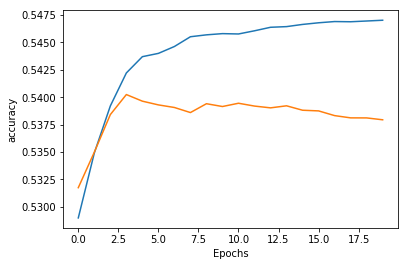

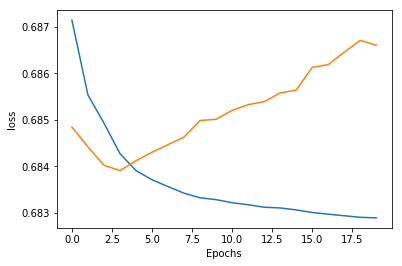

In [10]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
import numpy as np
phrase='I am awesome'
tokens = tokenizer.encode(phrase)
model.predict(np.array(tokens))

array([[0.48538628],
       [0.48538628],
       [0.76511854]], dtype=float32)